In [56]:
from sklearn import model_selection, cross_validation, datasets, neighbors, metrics, naive_bayes
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
from scipy import stats, optimize
warnings.filterwarnings('ignore')

%matplotlib inline

/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 2. Наивный байесовский классификатор


In [57]:
digits_data, digits_target = datasets.load_digits(return_X_y=True)
breast_cancer_data, breast_cancer_target = datasets.load_breast_cancer(return_X_y=True)

In [59]:
print (digits_data[0])
print (digits_data[0].shape)

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
(64,)


Можно заметить, что все признаки - целые

In [62]:
print (breast_cancer_data[0])
print (breast_cancer_data[0].shape)

[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
   1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
   2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
   8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
   5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
   2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
   1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
   4.60100000e-01   1.18900000e-01]
(30,)


Здесь же признаки - десятичные дроби

In [63]:
classifiers = [naive_bayes.BernoulliNB(), naive_bayes.MultinomialNB(), naive_bayes.GaussianNB()]
names = ["BernoulliNB", "MultinomialNB", "GaussianNB"]
digits_acc = [model_selection.cross_val_score(clf, digits_data, digits_target).mean() for clf in classifiers]
bc_acc = [model_selection.cross_val_score(clf, breast_cancer_data,
                                          breast_cancer_target).mean() for clf in classifiers]

In [70]:
print ("Results:")
for i in np.arange(len(names)):
    print ("\t{} score is {:.3f}".format(names[i], digits_acc[i]))

Results:
	BernoulliNB score is 0.826
	MultinomialNB score is 0.871
	GaussianNB score is 0.819


In [71]:
print ("breast_cancer results:")
for i in np.arange(len(names)):
    print ("\t{} score is {:.3f}".format(names[i], bc_acc[i]))

breast_cancer results:
	BernoulliNB score is 0.627
	MultinomialNB score is 0.895
	GaussianNB score is 0.937


*Насколько полученные результаты согласуются с вашими ожиданиями?*

Как и ожидалось, бернуллиевский подход оказался хуже всех, т.к. данные не совсем подходят под предполагаемый (бинарный) формат данных, но даже при этом предположении результат не совсем никудышный. Да, мультиноминальное справилось отлично, к тому же данные были весьма разрешенные.

Ответы на вопросы:

1. *Каким получилось максимальное качество классификации на датасете breast_cancer?*

    0.937
    
2. *Каким получилось максимальное качество классификации на датасете digits?*

    0.871
    
3. *Какие утверждения из приведенных ниже верны?*

    (a) *На вещественных признаках лучше всего сработал наивный байесовский классификатор с распределением Бернулли*
     
     Неверно
     
    (b) *На вещественных признаках лучше всего сработал наивный байесовский классификатор с мультиномиальным
    распределением*
     
     Неверно
     
    (c) *Мультиномиальное распределение лучше показало себя на выборке с целыми неотрицательными значениями признаков*
    
    Верно
    
    (d) *На вещественных признаках лучше всего сработало нормальное распределение*
     
     Верно

# 3. Метрики в задаче регрессии

In [13]:
from scipy import stats as sps
from scipy.optimize import minimize
from matplotlib import pyplot as plt

import numpy as np

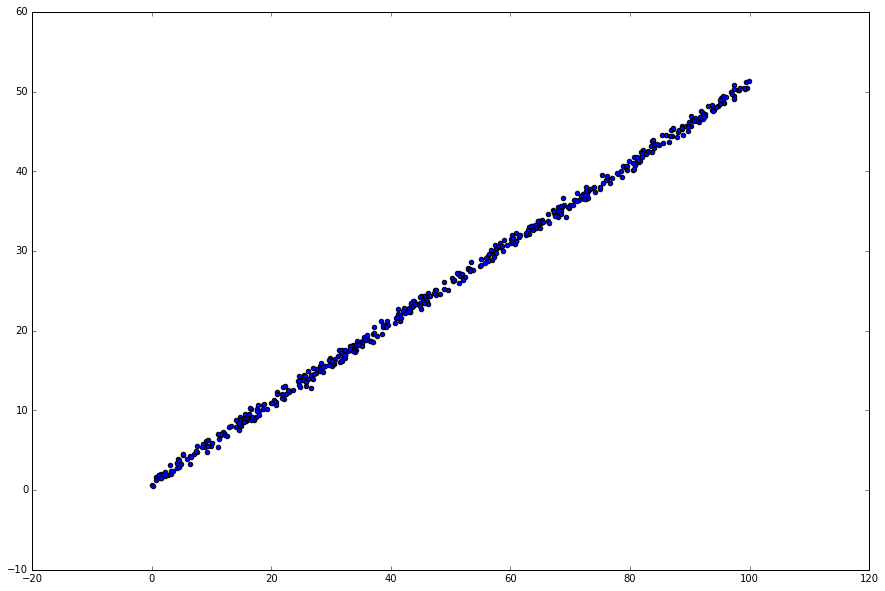

In [20]:
x = sps.uniform.rvs(0, 100, size=500)
y = 0.5 * x + 1 + sps.norm.rvs(scale=0.2 ** 0.5, size=500)

plt.figure(figsize=(15, 10))
plt.scatter(x, y)
plt.show()

In [17]:
def MSE(temp):
    a,b = temp
    return ((a * x + b - y) ** 2).mean()

def MAE(temp):
    a,b = temp
    return np.abs(a * x + b - y).mean()
    

In [19]:
mse = minimize(MSE, [0, 0])
mae = minimize(MAE, [0, 0])
print (mse, mae)

      fun: 0.19827325086981618
 hess_inv: array([[  6.25749187e-04,  -3.14371958e-02],
       [ -3.14371958e-02,   2.07938244e+00]])
      jac: array([ -7.45058060e-09,  -3.72529030e-09])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.50006117,  0.98850812])       fun: 0.35730676255337246
 hess_inv: array([[ 0.00022921, -0.00022938],
       [-0.00022938,  0.00023336]])
      jac: array([  7.45058060e-09,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 208
      nit: 10
     njev: 52
   status: 0
  success: True
        x: array([ 0.50051128,  0.96180556])


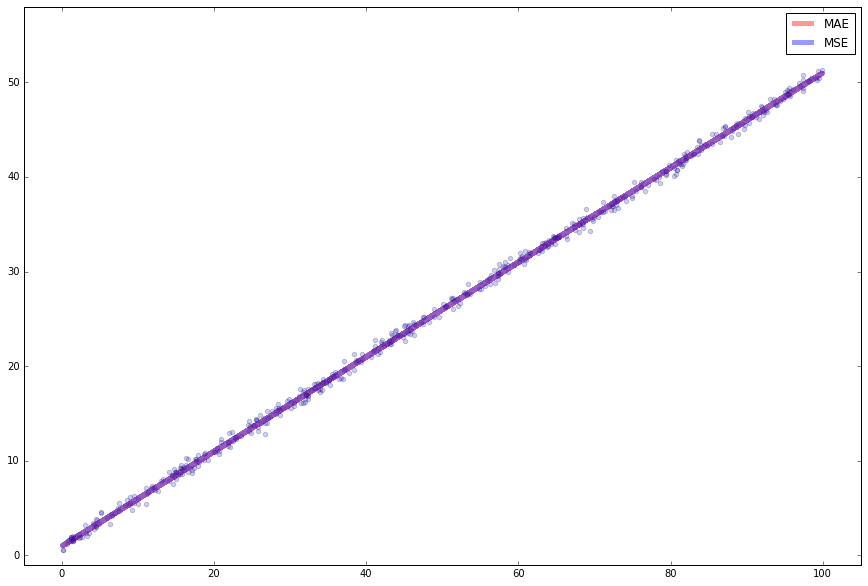

In [34]:
plt.figure(figsize=(15, 10))
plt.scatter(x, y, alpha=0.2)

plt.plot(x, mae.x[0] * x + mae.x[1], c='r', alpha=0.4, lw=5, label="MAE")
plt.plot(x, mse.x[0] * x + mse.x[1], c='b', alpha=0.4, lw=5, label="MSE")

plt.xlim(-5, 105)
plt.ylim(-1, 58)
plt.legend()
plt.show()

In [35]:
x = np.append(x, sps.uniform.rvs(0, 100, size=75))
y = np.append(y, -1 + sps.norm.rvs(scale=0.2 ** 0.5, size=75))

In [37]:
mse = minimize(MSE, [0, 0])
mae = minimize(MAE, [0, 0])
print (mse, mae)

      fun: 100.10363187257344
 hess_inv: array([[  6.17299552e-04,  -3.00168904e-02],
       [ -3.00168904e-02,   1.95960265e+00]])
      jac: array([  0.00000000e+00,  -4.76837158e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.43824863,  0.64431839])       fun: 3.7170897212799376
 hess_inv: array([[ 3.86284415, -3.8624545 ],
       [-3.8624545 ,  3.86206425]])
      jac: array([-0.00401849,  0.00173914])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 688
      nit: 11
     njev: 171
   status: 2
  success: False
        x: array([ 0.49958386,  0.96780172])


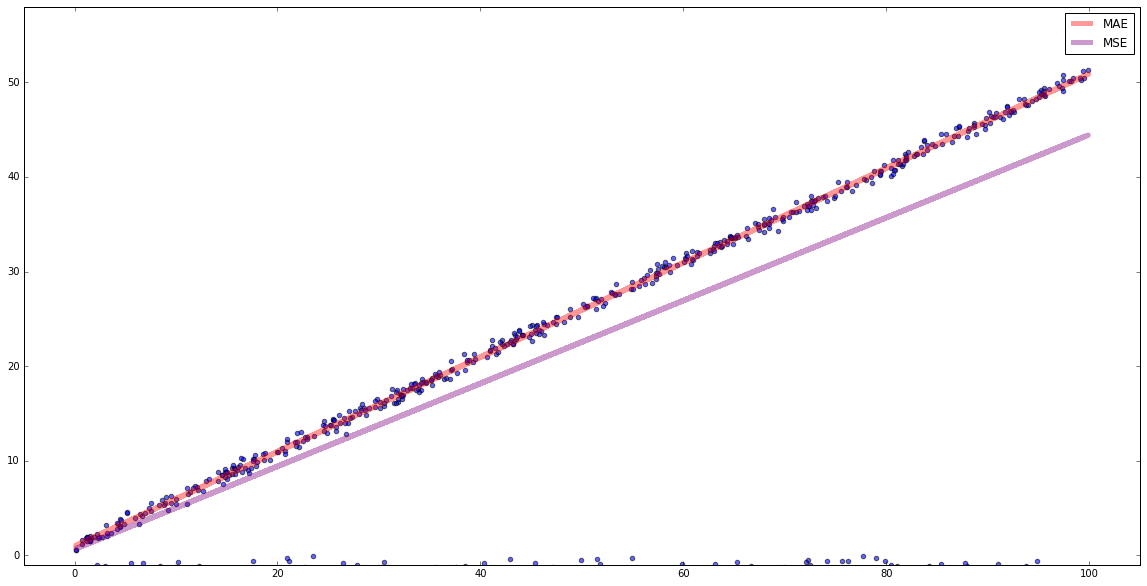

In [45]:
plt.figure(figsize=(20, 10))
plt.scatter(x, y, alpha=0.6)

plt.plot(x, mae.x[0] * x + mae.x[1], c='r', alpha=0.4, lw=5, label="MAE")
plt.plot(x, mse.x[0] * x + mse.x[1], c='purple', alpha=0.4, lw=5, label="MSE")

plt.xlim(-5, 105)
plt.ylim(-1, 58)
plt.legend()
plt.show()

Подытожим: как можно увидеть, на выбросах алгоритм оптимизации MSE работает не так хорошо, как оптимизация MAE, подосвывая не совсем верную зависимость. В то время как MAE на представленных данных работает достаточно корректно, несмотря на присутствие выбросов.